In [504]:
import pandas as pd
import numpy as np

In [505]:
df = pd.read_csv('Country-data.csv')

In [506]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Checking if there are any null values in data

In [507]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

No nulll values in data

In [508]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

Removing unnecessary columns so that the dataframe has only values

In [509]:
df.drop('country',axis = 1,inplace = True)

In [254]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Standardisation of values using MinMaxScaler

In [255]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [373]:
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


Using Elbow method to choose the number of clusters

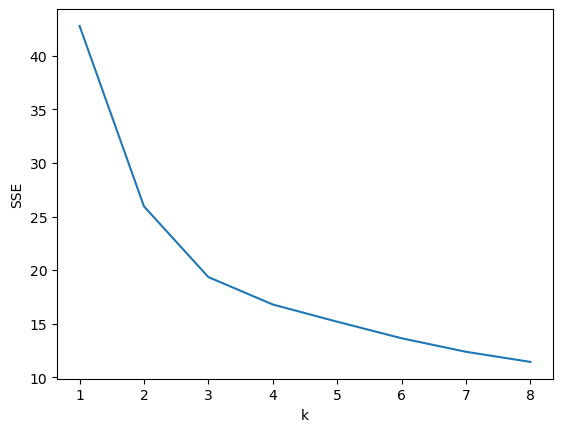

In [510]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sse = []
for k in range(1,9):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 9),sse)
plt.xlabel('k')
plt.ylabel('SSE')
plt.show()

In [511]:
numpy_df = df_scaled.to_numpy()

From the graph, let us choose number_of_clusters as 3
Now we do the necessary computation to get 3 clusters

In [512]:
n = 3
from scipy.spatial.distance import euclidean
numpy_df = df_scaled.to_numpy()
    
def kmeans(X):
    # choosing 3 random points
    c1 = np.zeros([10,9])
    c2 = np.zeros([10,9])
    c3 = np.zeros([10,9])
    c1[0] = X[10]
    c2[0] = X[20]
    c3[0] = X[30]
    merged_df_list = []
    m = 1
    for n in range(10):
        # finding the euclidean distance between all observations and the random points chosen
        
        distance1 = [euclidean(X[i],c1[n]) for i in range(0,166)]
        distance2 = [euclidean(X[i],c2[n]) for i in range(0,166)]
        distance3 = [euclidean(X[i],c3[n]) for i in range(0,166)]
        
        dis1 = pd.DataFrame(distance1)
        dis2 = pd.DataFrame(distance2)
        dis3 = pd.DataFrame(distance3)
        # creating a merged matrix of distances
        iter_matrix = pd.concat([dis1, dis2, dis3], axis=1).to_numpy()
        
        # creating an array of minimum values of the distances from each row
        min_values = np.amin(iter_matrix, axis=1)
        
        # creating an array of zeros
        cluster_column = np.zeros([167,1])
        
        #assigning value '0' if the minimum distance calculated is from cluster 1,'1' if its from cluster 2, '2' if it is from cluster 3
        
        for j in range(0,iter_matrix.shape[0]):
            for i in range(0,iter_matrix.shape[1]):
                if iter_matrix[j][i] == min_values[j]:
                    cluster_column[j] = (i)
                    break
        
        # concatenating the original dataframe with the cluster label
        clus_col_with_obs = np.concatenate((X,cluster_column),axis=1)
        clus_with_obs_df = pd.DataFrame(clus_col_with_obs,columns = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','cluster'])
        
        #creating a dataframe for each cluster that contains the observations in each cluster
        
        clus1 = clus_with_obs[clus_with_obs['cluster']==0].drop(['cluster'],axis = 1)
        clus2 = clus_with_obs[clus_with_obs['cluster']==1].drop(['cluster'],axis = 1)
        clus3 = clus_with_obs[clus_with_obs['cluster']==2].drop(['cluster'],axis = 1)
        # the new centroid values will keep getting updated for each iteration
        # to end the iterations, I have kept a condition saying that if the matrix of 10x9 of c1 is full, thn end the for loop
        if (c1 == 0).any():
            print("")
        else:
            break
        # calculating the centroid for each cluster and updating them to the cluster matrices respectively
        c1[m] = clus1.mean()
        c2[m] = clus2.mean()
        c3[m] = clus3.mean()
        m = m+1
    return clus1,clus2,clus3,clus_with_obs_df
    
        
clus1,clus2,clus3,clus_with_obs = kmeans(numpy_df)


In [513]:
clus_with_obs.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,cluster
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,2.0
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,1.0
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,1.0
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,2.0
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,1.0


In [514]:
from sklearn.metrics import silhouette_score

In [515]:
# Calculate the silhouette score
score = silhouette_score(df_scaled,clus_with_obs['cluster'])
score

0.3280758494695637

PCA Analysis

In [401]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [408]:
X = df_scaled.values

Centering the data

In [ ]:
X_centered = X - np.mean(X , axis = 0)
X_centered

Calculating the Covariance Matrix

In [411]:
cov_mat = np.cov(X_meaned , rowvar = False)
cov_mat.shape
# the covariance matrix will be a 9x9 matrix as there are 9 variables

(9, 9)

Calculating teh EigenVectors and EiegenValues using Covariance matrix

In [412]:
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

Sorting the Eigen values in descendiung order

In [417]:
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

Select the dimension we want to reduce to

In [423]:
n_components = 2
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

array([[-8.07327698e-04,  5.57055026e-04],
       [ 5.11348092e-04, -9.41707964e-04],
       [ 2.52724061e-05,  2.15627987e-04],
       [ 1.14384869e-04, -5.41883715e-05],
       [ 7.26746756e-01, -6.86903991e-01],
       [-7.65998651e-05, -2.85616792e-04],
       [ 2.13850032e-04, -2.66353737e-05],
       [-2.87952778e-05,  2.40728708e-05],
       [ 6.86904777e-01,  7.26747258e-01]])

Transforming the data from 9 dimensions to 2 dimensiuons

In [477]:
X_reduced = np.dot(eigenvector_subset.transpose(),X_centered.transpose()).transpose()
X_reduced = pd.DataFrame(X_reduced, columns = ['var1','var2'])

In [478]:
cluster_label = clus_with_obs['cluster']

In [481]:
X_reduced_with_cluster = pd.concat((X_reduced,cluster_label), axis=1)

In [487]:
dim_reduced_clus1 = X_reduced_with_cluster[X_reduced_with_cluster['cluster']==0].drop(['cluster'],axis = 1)
dim_reduced_clus2 = X_reduced_with_cluster[X_reduced_with_cluster['cluster']==1].drop(['cluster'],axis = 1)
dim_reduced_clus3 = X_reduced_with_cluster[X_reduced_with_cluster['cluster']==2].drop(['cluster'],axis = 1)

Visualising the transformed data (in 2 dimensions)

In [488]:
import seaborn as sb

<AxesSubplot:xlabel='var1', ylabel='var2'>

<Figure size 600x600 with 0 Axes>

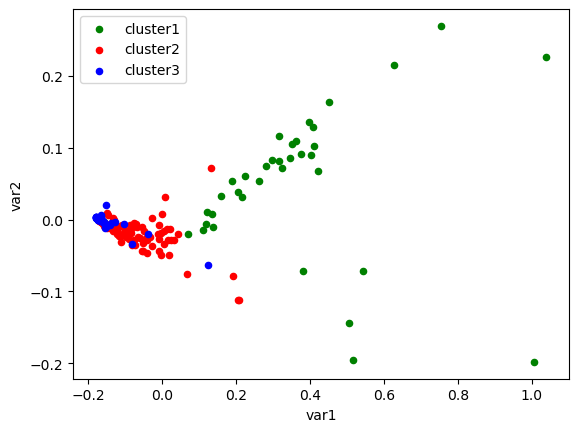

In [496]:
plt.figure(figsize = (6,6))
axes = dim_reduced_clus1.plot(kind = 'scatter', x = 'var1',y = 'var2',color = 'green',label = 'cluster1')
axes1 = dim_reduced_clus2.plot(kind = 'scatter', x = 'var1',y = 'var2',color = 'red',label = 'cluster2',ax = axes)
dim_reduced_clus3.plot(kind = 'scatter', x = 'var1',y = 'var2',color = 'blue',label = 'cluster3',ax = axes1)